In [1]:
import datetime
import glob
import numpy as np
import pandas as pd

from utils_plotting import plot_spread_analysis

In [2]:
csv_files = glob.glob('./data/stock1-*.csv')
dfs = []

for file in csv_files:
    print(f'appending data from {file}')
    df = pd.read_csv(file)
    dfs.append(df)

appending data from ./data/stock1-2025-07-02-cleaned.csv
appending data from ./data/stock1-2025-07-07-cleaned.csv


In [3]:
combined_df = pd.concat(dfs, ignore_index=True)

In [4]:
# See https://docs.python.org/3/library/datetime.html
# The hour is not zero padded, so %-I
combined_df['DateTime'] = pd.to_datetime(
    combined_df['Date'] + ' ' + combined_df['Time'],
    format='%m/%d/%Y %I:%M %p',
)

In [5]:
# Remove duplicates keeping the first occurrence.
clean_df = combined_df.drop_duplicates(subset=['DateTime'], keep='first')

# Sort by timestamp to ensure proper chronological order.
clean_df = clean_df.sort_values('DateTime').reset_index(drop=True)

In [6]:
clean_df.to_csv('./data/stock1_combined_price_data.csv', index=False)

In [7]:
df = pd.read_csv('./data/stock1_combined_price_data.csv')

df['DateTime'] = pd.to_datetime(df['DateTime'])

In [8]:
df.tail(1)

,Date,Time,Open,High,Low,Close,Volume,Simple Moving Average - SMA - SMA(20),Simple Moving Average - SMA - SMA(50),Simple Moving Average - SMA - SMA(200),"Exponential Moving Average - EMA - EMA(9,Modern)","Exponential Moving Average - EMA - EMA(61,Modern)",Relative Strength Index - RSI - RSI(14),"MACD - MACD(12,26,9)",MACD - Histogram,"MACD - Signal Line(MACD(12,26,9),9,Modern)",DateTime
698,07/07/2025,4:01 PM,5815.92,5815.92,5815.92,5815.92,24500,5800.79225,5781.251798,5740.015317,5809.306295,5781.871398,70.111677,9.821663,0.65446,9.167203,2025-07-07 16:01:00


In [9]:
df['DateTime'].iloc[0]

Timestamp('2025-06-26 16:00:00')

In [10]:
np.flip( df['DateTime'].dt.date.unique() )

array([datetime.date(2025, 7, 7), datetime.date(2025, 7, 3),
       datetime.date(2025, 7, 2), datetime.date(2025, 7, 1),
       datetime.date(2025, 6, 30), datetime.date(2025, 6, 27),
       datetime.date(2025, 6, 26)], dtype=object)

using 2025-07-03 as previous date
prev day close: 5640.0
price at close: 5815.92
first time: 2025-07-07 09:31:00, last time: 2025-07-07 16:01:00
closest time index for 09:30:00 on 2025-07-07: 0
closest time index for 09:45:00 on 2025-07-07: 9
closest time index for 15:00:00 on 2025-07-07: 74


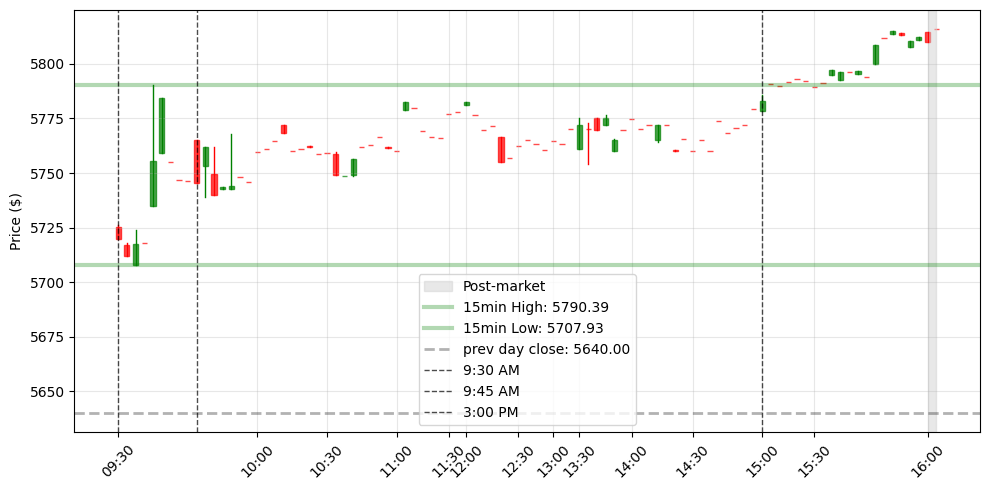

In [11]:
plot_spread_analysis(df, datetime.date(2025, 7, 7))

using 2025-07-02 as previous date
prev day close: 5701.76
price at close: 5640.0
first time: 2025-07-03 09:31:00, last time: 2025-07-03 13:11:00
closest time index for 09:30:00 on 2025-07-03: 0
closest time index for 09:45:00 on 2025-07-03: 5
closest time index for 15:00:00 on 2025-07-03: 70


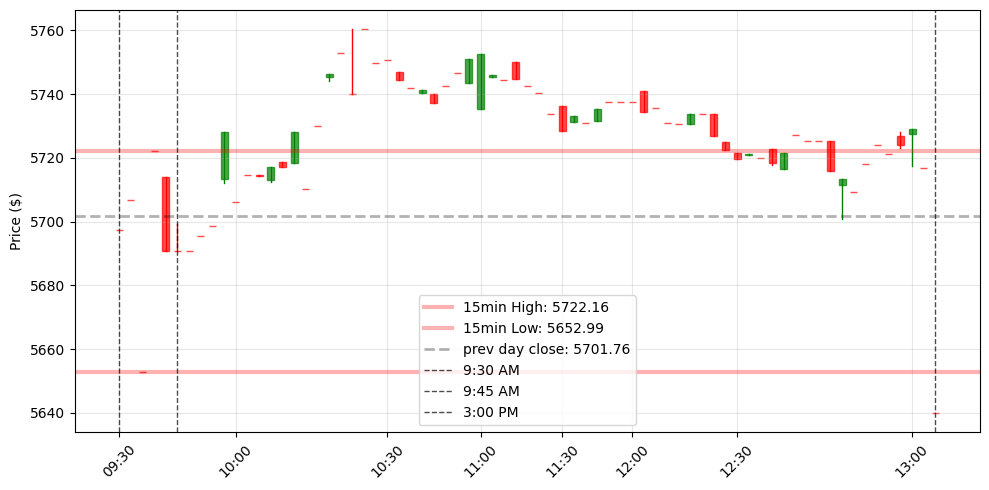

In [12]:
plot_spread_analysis(df, datetime.date(2025, 7, 3))

using 2025-07-01 as previous date
prev day close: 5730.73
price at close: 5701.76
first time: 2025-07-02 09:31:00, last time: 2025-07-02 16:01:00
closest time index for 09:30:00 on 2025-07-02: 0
closest time index for 09:45:00 on 2025-07-02: 7
closest time index for 15:00:00 on 2025-07-02: 73


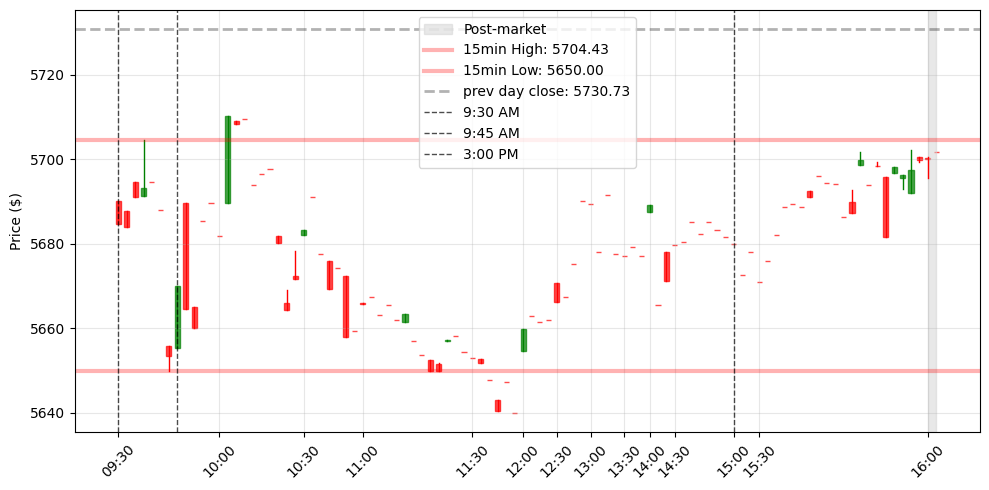

In [13]:
plot_spread_analysis(df, datetime.date(2025, 7, 2))

using 2025-06-30 as previous date
prev day close: 5789.24
price at close: 5730.73
first time: 2025-07-01 09:30:00, last time: 2025-07-01 16:01:00
closest time index for 09:30:00 on 2025-07-01: 0
closest time index for 09:45:00 on 2025-07-01: 9
closest time index for 15:00:00 on 2025-07-01: 86


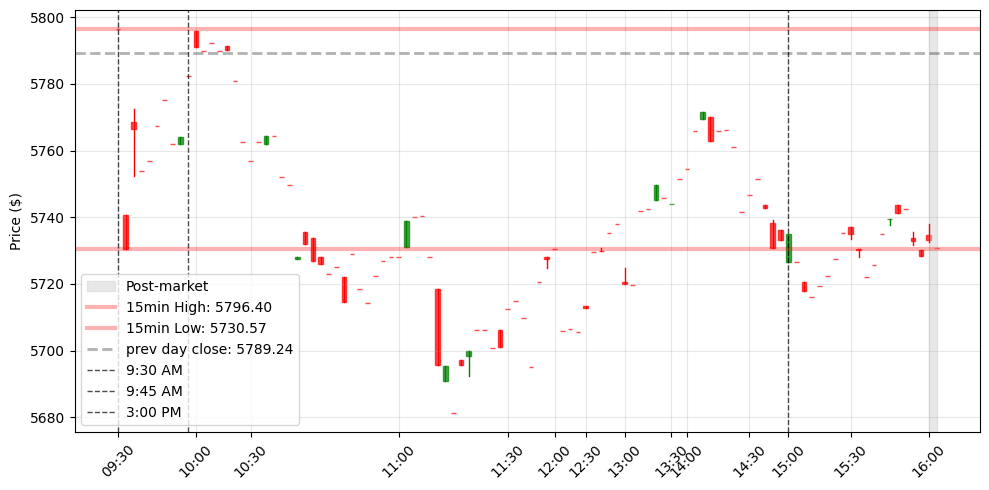

In [14]:
plot_spread_analysis(df, datetime.date(2025, 7, 1))

using 2025-06-27 as previous date
prev day close: 5693.1312
price at close: 5789.24
first time: 2025-06-30 09:31:00, last time: 2025-06-30 16:03:00
closest time index for 09:30:00 on 2025-06-30: 0
closest time index for 09:45:00 on 2025-06-30: 3
closest time index for 15:00:00 on 2025-06-30: 143


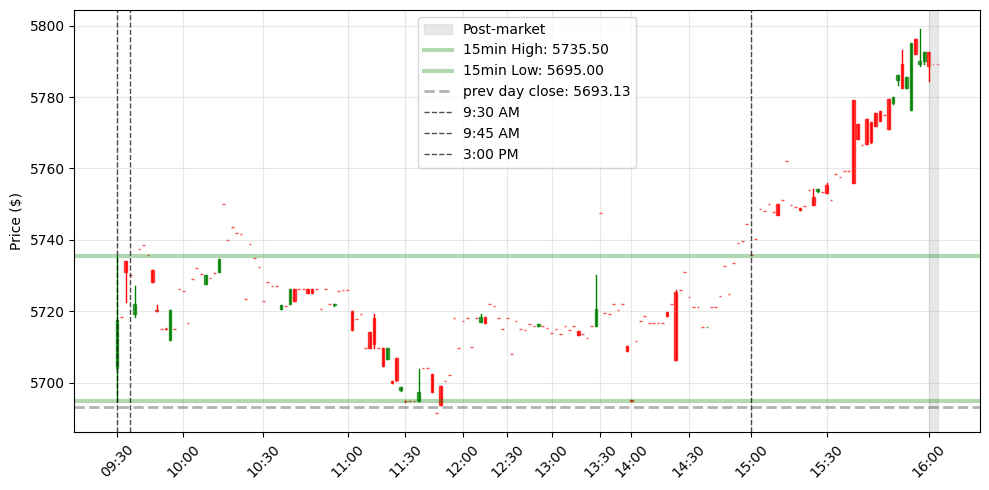

In [15]:
plot_spread_analysis(df, datetime.date(2025, 6, 30))

using 2025-06-26 as previous date
prev day close: 5596.0
price at close: 5693.1312
first time: 2025-06-27 09:31:00, last time: 2025-06-27 16:14:00
closest time index for 09:30:00 on 2025-06-27: 0
closest time index for 09:45:00 on 2025-06-27: 7
closest time index for 15:00:00 on 2025-06-27: 101


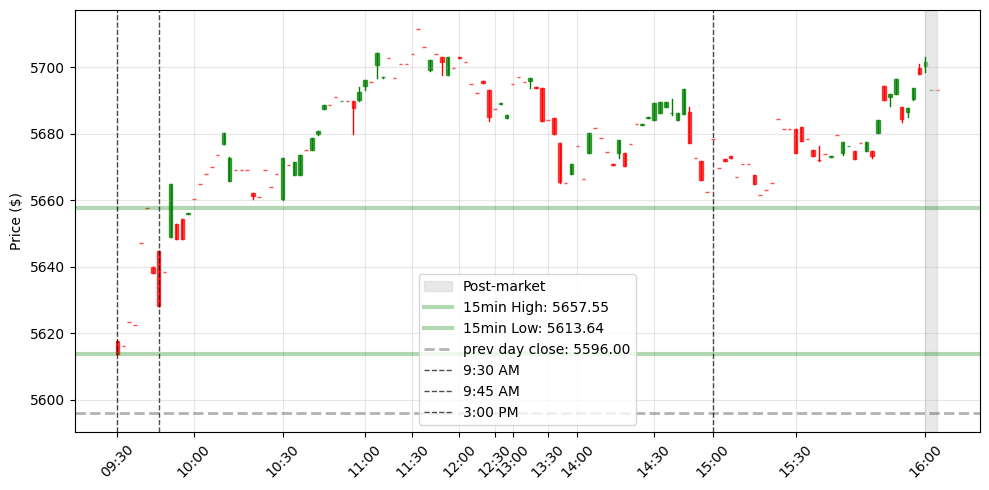

In [16]:
plot_spread_analysis(df, datetime.date(2025, 6, 27))